# **PREDICTING CUSTOMER CHURN**

**Problem Statement**

This project aims to develop a predictive model that can accurately identify customers who are likely to churn from a business by analyzing data from customer demographics, transaction history, customer service interactions, and online activity.

**Background**

Customer churn is the rate at which customers stop doing business with an entity, is a critical concern for businesses across various sectors.  Acquiring new customers is often significantly more expensive than retaining existing ones.  Therefore, understanding why customers churn and being able to predict which customers are at high risk of churning is crucial for business sustainability and profitability.

**Dataset Description**

The dataset describes customer behavior and transactional history for a retail store. It contains the following features for each customer:

Customer ID: A unique identifier for each customer.

Age: The customer's age.

Gender: The customer's gender.

Income Level: The customer's income level (categorized into Low, High, Medium).

Marital Status: The customer's marital status.

Transaction ID: A unique identifier for each transaction.

Transaction Date: The date of the transaction.

Amount Spent: The amount spent in the transaction.

Product Category: The category of the product purchased.

Last Login Date: The date of the customer's last login.

Service Usage: A measure of the customer's usage of the service.

Login Frequency: How often the customer logs in.

Churn Status: A binary variable indicating whether the customer has churned (that is 1 for churned, 0 for active).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import statements

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import StratifiedKFold
import pickle
from google.colab import files

## **Data Loading and Initial Exploration**

In [ ]:
# Creating the dataframe
df =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/customer_churn_data.csv")

In [ ]:
# Reviewing data types..

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        6812 non-null   int64  
 1   Age               6812 non-null   int64  
 2   Gender            6812 non-null   object 
 3   MaritalStatus     6812 non-null   object 
 4   IncomeLevel       6812 non-null   object 
 5   TransactionID     6812 non-null   int64  
 6   TransactionDate   6812 non-null   object 
 7   AmountSpent       6812 non-null   float64
 8   ProductCategory   6812 non-null   object 
 9   InteractionID     5204 non-null   float64
 10  InteractionDate   5204 non-null   object 
 11  InteractionType   5204 non-null   object 
 12  ResolutionStatus  5204 non-null   object 
 13  LastLoginDate     6812 non-null   object 
 14  LoginFrequency    6812 non-null   int64  
 15  ServiceUsage      6812 non-null   object 
 16  ChurnStatus       6812 non-null   int64  


In [ ]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,3/27/2022,416.50,Electronics,6363.0,3/31/2022,Inquiry,Resolved,10/21/2023,34,Mobile App,0
1,2,65,M,Married,Low,7250,8/8/2022,54.96,Clothing,3329.0,3/17/2022,Inquiry,Resolved,12/5/2023,5,Website,1
2,2,65,M,Married,Low,9660,7/25/2022,197.50,Electronics,3329.0,3/17/2022,Inquiry,Resolved,12/5/2023,5,Website,1
3,2,65,M,Married,Low,2998,1/25/2022,101.31,Furniture,3329.0,3/17/2022,Inquiry,Resolved,12/5/2023,5,Website,1
4,2,65,M,Married,Low,1228,7/24/2022,397.37,Clothing,3329.0,3/17/2022,Inquiry,Resolved,12/5/2023,5,Website,1


In [ ]:
df.tail()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
6807,1000,34,M,Widowed,Low,2724,9/8/2022,232.06,Groceries,NaN,NaN,NaN,NaN,8/13/2023,22,Mobile App,0
6808,1000,34,M,Widowed,Low,2917,12/13/2022,324.98,Books,NaN,NaN,NaN,NaN,8/13/2023,22,Mobile App,0
6809,1000,34,M,Widowed,Low,2979,6/15/2022,375.34,Groceries,NaN,NaN,NaN,NaN,8/13/2023,22,Mobile App,0
6810,1000,34,M,Widowed,Low,8594,4/8/2022,166.73,Books,NaN,NaN,NaN,NaN,8/13/2023,22,Mobile App,0
6811,1000,34,M,Widowed,Low,5529,11/23/2022,93.73,Furniture,NaN,NaN,NaN,NaN,8/13/2023,22,Mobile App,0


In [ ]:
# checking for null columns

df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
MaritalStatus,0
IncomeLevel,0
TransactionID,0
TransactionDate,0
AmountSpent,0
ProductCategory,0
InteractionID,1608


## **Data Cleaning and Preprocessing**

**Removing Irregularities**

In [ ]:
#  Fill missing numerical values with the median and categorical values with the mode.
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that missing values have been addressed
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 CustomerID          0
Age                 0
Gender              0
MaritalStatus       0
IncomeLevel         0
TransactionID       0
TransactionDate     0
AmountSpent         0
ProductCategory     0
InteractionID       0
InteractionDate     0
InteractionType     0
ResolutionStatus    0
LastLoginDate       0
LoginFrequency      0
ServiceUsage        0
ChurnStatus         0
dtype: int64


<ipython-input-8-a899819b761e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-8-a899819b761e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
# Separate numerical and categorical features
numerical_features = ['Age', 'AmountSpent', 'Login Frequency']
categorical_features = ['Gender','IncomeLevel', 'Marital Status', 'Products', 'InteractionType', 'ServiceUsage', 'ResolutionStatus', 'ResolutionType']

# Numerical transformer
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformer
categorical_transformer = ColumnTransformer(transformers=[
    ('onehot_nominal', OneHotEncoder(handle_unknown='ignore'), ['Products', 'InteractionType', 'ServiceUsage', 'Gender', 'Marital Status']), #Added Gender and Marital Status to onehotencoder.
    ('binary', LabelEncoder(), ['ResolutionStatus', 'ResolutionType'])
])

# Full preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Convert the date columns to datetime format to allow for mathematical functions
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['InteractionDate'] = pd.to_datetime(df['InteractionDate'])
df['LastLoginDate'] = pd.to_datetime(df['LastLoginDate'])

# Using the maximum date found in the dataset as the reference
reference_date = df[['InteractionDate', 'LastLoginDate']].max().max()

# Calculate recency features: the number of days since the last interaction and last login
df['DaysSinceTransaction'] = (reference_date - df['TransactionDate']).dt.days
df['DaysSinceInteraction'] = (reference_date - df['InteractionDate']).dt.days
df['DaysSinceLastLogin'] = (reference_date - df['LastLoginDate']).dt.days

In [ ]:
# Checking the distribution od data
X = df.drop(['ChurnStatus', 'CustomerID', 'TransactionID', 'TransactionDate', 'InteractionID', 'InteractionDate', 'LastLoginDate'], axis=1)
y = df['ChurnStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Class distribution before SMOTE:")
print(y_train.value_counts(normalize=True) * 100)  # Normalize=True gives percentages

Class distribution before SMOTE:
ChurnStatus
0    79.81281
1    20.18719
Name: proportion, dtype: float64


This output would indicate that approx 80% of the customers in the dataset have not churned, while approx 20% have churned. This indicates a class imbalance, where the majority class (non-churned) is significantly larger than the minority class (churned).

In [ ]:
# Apply smote

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts(normalize=True) * 100)


Class distribution after SMOTE:
ChurnStatus
0    50.0
1    50.0
Name: proportion, dtype: float64


In [ ]:
# Initialize and train a model (using resampled data)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns  # Assuming X_train has column names

# Create a DataFrame for easier visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(importance_df)
# or
# importance_df.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
# plt.show()

                   Feature  Importance
26      DaysSinceLastLogin    0.116375
3           LoginFrequency    0.109116
0                      Age    0.091299
25    DaysSinceInteraction    0.085567
24    DaysSinceTransaction    0.043131
2              AmountSpent    0.041213
15           income_Medium    0.035132
22  service_Online Banking    0.034003
21      service_Mobile App    0.031578
19     resolution_Resolved    0.030911
14              income_Low    0.029755
13             income_High    0.028801
23         service_Website    0.028455
10         marital_Married    0.027790
11          marital_Single    0.027519
6      product_Electronics    0.025472
9         marital_Divorced    0.023256
20   resolution_Unresolved    0.022987
12         marital_Widowed    0.022639
5         product_Clothing    0.019716
7        product_Furniture    0.018683
1                   Gender    0.018419
4            product_Books    0.018315
17    interaction_Feedback    0.017985
16   interaction_Complain

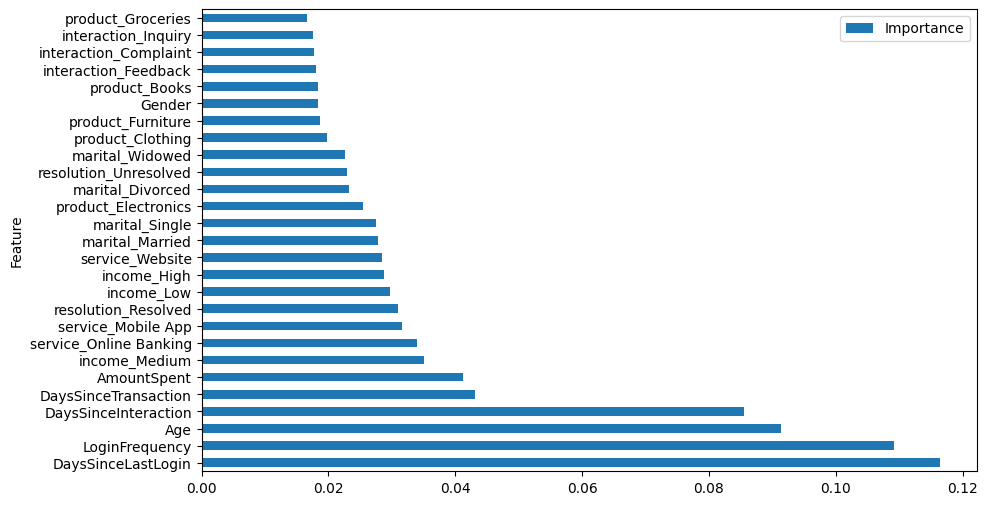

In [ ]:
importance_df.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.show()

In [ ]:
# Select top 5 features
top_5_features = importance_df['Feature'][:5].tolist()

# Create new feature matrices
X_train_resampled_top5 = X_train_resampled[top_5_features]
X_test_top5 = X_test[top_5_features]

# Retrain the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled_top5, y_train_resampled)

# Evaluate on test data
y_pred_top5 = model.predict(X_test_top5)
accuracy_top5 = accuracy_score(y_test, y_pred_top5)
print(f"Accuracy with top 5 features: {accuracy_top5}")

Accuracy with top 5 features: 0.9911958914159942


In [ ]:
# Perform stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_resampled_top5, y_train_resampled, cv=skf, scoring='accuracy')

# Analyze results
print(f"Cross-validation scores: {cv_scores}")
print(f"Average accuracy: {cv_scores.mean()}")

Cross-validation scores: [0.97126437 0.96954023 0.97011494 0.96837263 0.96319724]
Average accuracy: 0.9684978815939932


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_top5))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_top5))
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1111
           1       0.98      0.98      0.98       252

    accuracy                           0.99      1363
   macro avg       0.99      0.99      0.99      1363
weighted avg       0.99      0.99      0.99      1363

Confusion Matrix:
 [[1105    6]
 [   6  246]]
ROC-AUC Score: 0.9971997199719972


# **Model Deployment**

**Saving the Model Using Pickle**

In [ ]:
with open("model.pkl", "wb") as f:
  pickle.dump(model, f)

In [ ]:
# check if model.pkl was created

!ls

#this lists out your folder or drive

**Save model.pkl to localdrive**

In [ ]:
# saving model.pkl to computer drive

files.download("model.pkl")

**Save file containing Streamlit code to local drive**

In [ ]:
from re import M
# streamlit code

%%writefile app.py

import pickle
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# load the file that contains the model (model.pkl)
with open("model.pkl", "rb") as f:
  model = pickle.load(f)

# give the Streamlit app page a title
st.title("Customer Churn Predictor")

# input widget for getting user values for X (feature matrix value)
Last_Login_Days = st.slider("DaysSinceLastLogin", min_value=0, max_value=1000, value=20)
Login_Freq = st.slider("LoginFrequency", min_value=0, max_value=1000, value=20)
Age = st.slider("Age", min_value=0, max_value=1000, value=20)
Last_Interaction_Days = st.slider("DaysSinceInteraction", min_value=0, max_value=1000, value=20)
Amount_Spent = st.slider("AmountSpent", min_value=0, max_value=1000, value=20)
Last_Transaction_Days = st.slider("DaysSinceTransaction", min_value=0, max_value=1000, value=20)
Gender = st.slider("Gender", min_value=0, max_value=1000, value=20)
Income_Medium = st.slider("Income_Medium", min_value=0, max_value=1000, value=20)
Marital_Status_Widowed = st.slider("Marital_Widowed", min_value=0, max_value=1000, value=20)
Marital_Status_Divorced = st.slider("Marital_Divorced", min_value=0, max_value=1000, value=20)

# After selecting features
if st.button("Predict"):

    # Prepare input data (important: scale the input like the training data)
  input_data = np.array([[Last_Login_Days, Login_Freq, Age, Last_Interaction_Days, Amount_Spent, Last_Transaction_Days, Gender, Income_Medium, Marital_Status_Widowed, Marital_Status_Divorced]])
  input_data_scaled = scaler.transform(input_data)  # Scale the input

  # Make prediction
  churn_probability = model.predict_proba(input_data_scaled)[0][1] # Probability of churn (class 1)
  churn_prediction = model.predict(input_data_scaled)[0] # 0 or 1 for no churn or churn
  st.write(f"The probability of this customer churning is {churn_probability:.2%}")

if churn_prediction == 1:
  st.warning("Customer is likely to churn.")
else:
  st.success("Customer is not likely to churn.")